# Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Functions

In [2]:
def step_func(x, t, D_start, D_stop):
    if t > D_start and t < D_stop:
        return x
    else:
        return 0

def act_hill(y, K, n):
    return y ** n / (K ** n + y ** n)

def rep_hill(y, K, n):
    return K ** n / (K ** n + y ** n)

def normal_rate(x, alfa, beta, a, K_ax, n):
    return beta * act_hill(a, K_ax, n) - alfa * x

def C1_rate(x, alfa, beta, a, b, K_ax, K_bx, n):
    return beta * act_hill(a, K_ax, n) * act_hill(b, K_bx, n) - alfa * x

def I1_rate(x, alfa, beta, a, b, K_ax, K_bx, n):
    return 2.2 * beta * act_hill(a, K_ax, n) * rep_hill(b, K_bx, n) - alfa * x

def interlocked_FFLs(u, t, alfa, beta, Ks, D_start, D_stop, n):
    
    x1,y1,z1,x2,y2,z2,z3 = u
    # Ks depending on x1
    K_x1y1 = Ks[0]
    K_x1z1 = Ks[1]
    K_x1x2 = Ks[2]
    
    # Ks depending on y1
    K_y1z1 = Ks[3]
    K_y1x2 = Ks[4]
    
    # Ks depending on x2
    K_x2y2 = Ks[5]
    K_x2z2 = Ks[6]
    K_x2z3 = Ks[7]
    
    # Ks depending on y2
    K_y2z2 = Ks[8]
    K_y2z3 = Ks[9]
    
    beta_x1 = step_func(x1, t, D_start, D_stop)
    
    # First multi-ouput FFL
    dx1dt = beta_x1 - alfa * x1
    dy1dt = normal_rate(y1, alfa, beta, x1, K_x1y1, n)
    dz1dt = I1_rate(z1, alfa, beta, x1, y1, K_x1z1, K_y1z1, n)
    dx2dt = C1_rate(x2, alfa, beta, x1, y1, K_x1x2, K_y1x2, n)
    
    # Second multi-output FFL
    dy2dt = normal_rate(y2, alfa, beta, x2, K_x2y2, n)
    dz2dt = I1_rate(z2, alfa, beta, x2, y2, K_x2z2, K_y2z2, n)
    dz3dt = C1_rate(z3, alfa, beta, x2, y2, K_x2z3, K_y2z3, n)
    
    return dx1dt, dy1dt, dz1dt, dx2dt, dy2dt, dz2dt, dz3dt

# Conditions

In [3]:
t = np.linspace(0,10)
n = 7
alfa = 1
beta = 5
Ks = [2.5] * 10
u0 = [0] * 7

D_start = 0
D_stop = 10
u0[0] = 5

# Solving and plots

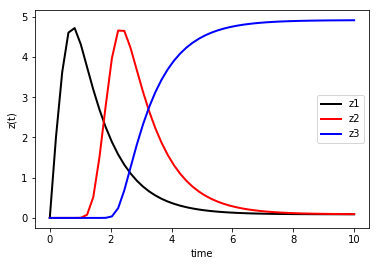

In [4]:
u = odeint(interlocked_FFLs, u0, t, (alfa, beta, Ks, D_start, D_stop, n))

z1 = u[:,2]
z2 = u[:,5]
z3 = u[:,6]

plt.plot(t, z1, 'k-', linewidth=2, label='z1')
plt.plot(t, z2, 'r-', linewidth=2, label='z2')
plt.plot(t, z3, 'b-', linewidth=2, label='z3')
plt.xlabel('time')
plt.ylabel('z(t)')
plt.legend()
plt.show()